<a href="https://colab.research.google.com/github/Gaurav-Sharma-007/MovieTicketsPricePrediction/blob/main/MovieTicketsPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [4]:
df = pd.read_csv('/content/cinemaTicket_Ref.csv')
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26.0,610.328638,2018-05-05,5.0,2.0,5.0
1,1492,352,3360000,42,0,5,8.08,80000.0,42.0,519.801980,2018-05-05,5.0,2.0,5.0
2,1492,489,2560000,32,0,4,20.00,80000.0,32.0,160.000000,2018-05-05,5.0,2.0,5.0
3,1492,429,1200000,12,0,1,11.01,100000.0,12.0,108.991826,2018-05-05,5.0,2.0,5.0
4,1492,524,1200000,15,0,3,16.67,80000.0,15.0,89.982004,2018-05-05,5.0,2.0,5.0


In [5]:
df['cinema_code'].value_counts()

489    307
524    286
448    262
163    262
344    252
      ... 
463      6
230      5
313      5
185      2
413      1
Name: cinema_code, Length: 210, dtype: int64

In [6]:
df.dtypes

film_code         int64
cinema_code       int64
total_sales       int64
tickets_sold      int64
tickets_out       int64
show_time         int64
occu_perc       float64
ticket_price    float64
ticket_use      float64
capacity        float64
date             object
month           float64
quarter         float64
day             float64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [8]:
df.dtypes

film_code                int64
cinema_code              int64
total_sales              int64
tickets_sold             int64
tickets_out              int64
show_time                int64
occu_perc              float64
ticket_price           float64
ticket_use             float64
capacity               float64
date            datetime64[ns]
month                  float64
quarter                float64
day                    float64
dtype: object

In [9]:
df['date'].value_counts()

2018-07-03    219
2018-07-06    187
2018-05-24    183
2018-07-04    181
2018-05-25    178
             ... 
2018-11-03      1
2018-10-26      1
2018-10-24      1
2018-11-04      1
2018-07-09      1
Name: date, Length: 177, dtype: int64

In [10]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month

In [11]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,1492,304,3900000,26,0,4,4.26,150000.0,26.0,610.328638,2018-05-05,5.0,2.0,5.0,2018.0
1,1492,352,3360000,42,0,5,8.08,80000.0,42.0,519.801980,2018-05-05,5.0,2.0,5.0,2018.0
2,1492,489,2560000,32,0,4,20.00,80000.0,32.0,160.000000,2018-05-05,5.0,2.0,5.0,2018.0
3,1492,429,1200000,12,0,1,11.01,100000.0,12.0,108.991826,2018-05-05,5.0,2.0,5.0,2018.0
4,1492,524,1200000,15,0,3,16.67,80000.0,15.0,89.982004,2018-05-05,5.0,2.0,5.0,2018.0


In [12]:
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       3
ticket_price    1
ticket_use      1
capacity        4
date            1
month           1
quarter         1
day             1
year            1
dtype: int64

In [13]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
year            0
dtype: int64

In [14]:
df.shape

(13541, 15)

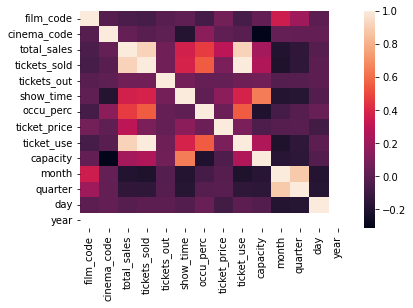

In [15]:
sns.heatmap(df.corr())
plt.show()

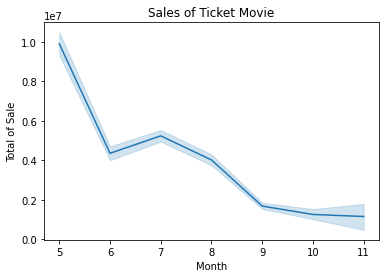

In [16]:
sns.lineplot(x=df['month'],y=df['total_sales'])

plt.title("Sales of Ticket Movie")
plt.xlabel("Month")
plt.ylabel("Total of Sale")

plt.show()

In [17]:
df['film_code'].value_counts()

1498    5544
1497    3911
1494    2715
1492    1086
1567     285
Name: film_code, dtype: int64

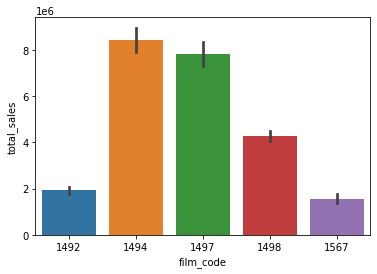

In [18]:
sns.barplot(x=df['film_code'],y=df['total_sales'])

plt.show()

In [19]:
df['quarter'].value_counts()

3.0    7189
2.0    6140
4.0     212
Name: quarter, dtype: int64

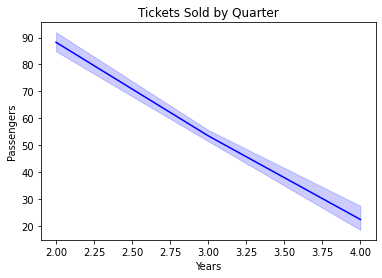

In [20]:
sns.lineplot(data=df, x="quarter", y="tickets_sold",color="b")

plt.title("Tickets Sold by Quarter")
plt.xlabel("Years")
plt.ylabel("Passengers")
plt.show()

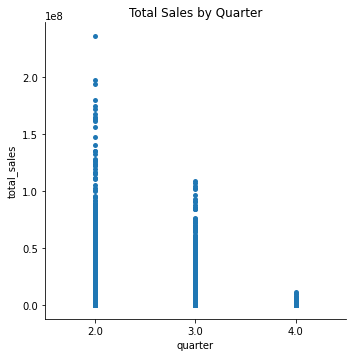

In [21]:
sns.catplot(x="quarter", y="total_sales", data=df,jitter=False)

plt.title("Total Sales by Quarter")

plt.show()

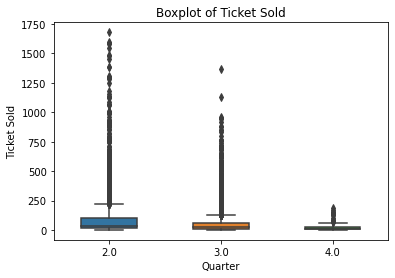

In [22]:
sns.boxplot( x=df["quarter"], y=df["tickets_sold"],width=0.5)

plt.title("Boxplot of Ticket Sold")
plt.ylabel("Ticket Sold")
plt.xlabel("Quarter")

plt.show()

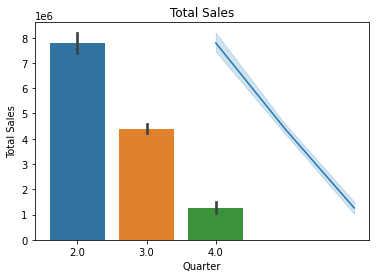

In [23]:
sns.barplot(x=df['quarter'],y=df['total_sales'])
sns.lineplot(x=df['quarter'],y=df['total_sales'])

plt.title("Total Sales")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.show()

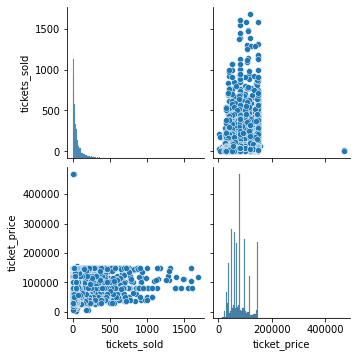

In [24]:
sns.pairplot(data=df, vars=["tickets_sold", "ticket_price"])

plt.show()

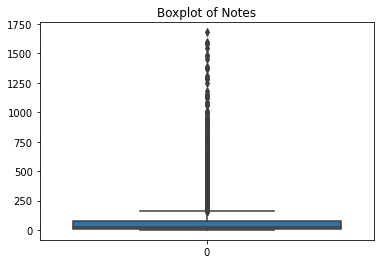

In [25]:
sns.boxplot(df['tickets_sold'])

plt.title("Boxplot of Notes")

plt.show()

In [26]:
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day,year
0,1492,304,3900000,26,0,4,4.26,150000.0,26.0,610.328638,2018-05-05,5.0,2.0,5.0,2018.0
1,1492,352,3360000,42,0,5,8.08,80000.0,42.0,519.801980,2018-05-05,5.0,2.0,5.0,2018.0
2,1492,489,2560000,32,0,4,20.00,80000.0,32.0,160.000000,2018-05-05,5.0,2.0,5.0,2018.0
3,1492,429,1200000,12,0,1,11.01,100000.0,12.0,108.991826,2018-05-05,5.0,2.0,5.0,2018.0
4,1492,524,1200000,15,0,3,16.67,80000.0,15.0,89.982004,2018-05-05,5.0,2.0,5.0,2018.0


In [27]:
X = df[['ticket_price', 'occu_perc', 'show_time', 'tickets_sold']]
y = df['total_sales']

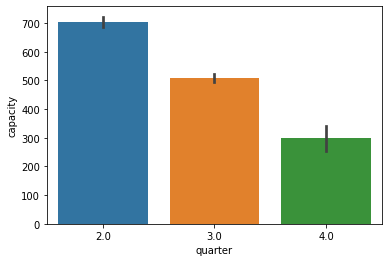

In [28]:
sns.barplot(x=df['quarter'],y=df['capacity'])

plt.show()

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [31]:
y_pred = lr.predict(X_test)

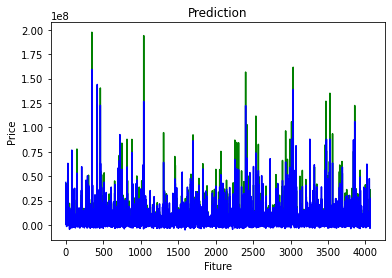

In [32]:
c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='g',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Fiture')
plt.ylabel('Price')
plt.title('Prediction')
plt.show()

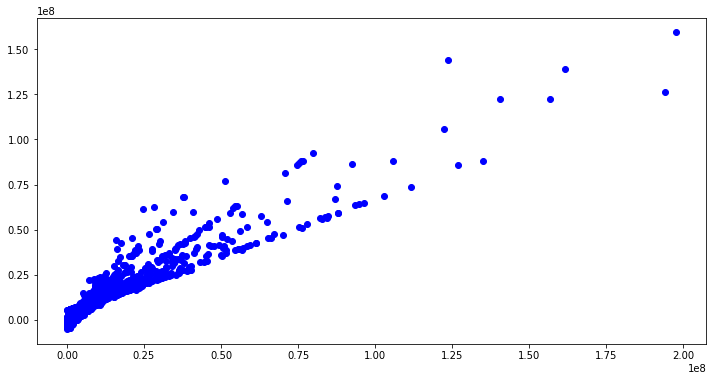

In [33]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='b',linestyle='-')
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [35]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.892938588103609

In [36]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

MAE: 2081246.1847134829
MSE: 17363366836149.666
RMSE: 4166937.34487929
